In [47]:
from google.colab import files


uploaded = files.upload()

Saving spambase.csv to spambase (1).csv


In [50]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("spambase (1).csv")

print("Path to dataset files:", path)

ValueError: Invalid dataset handle: spambase (1).csv

In [51]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['spambase (1).csv']))
print(df)

      word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0               0.00               0.64           0.64           0.0   
1               0.21               0.28           0.50           0.0   
2               0.06               0.00           0.71           0.0   
3               0.00               0.00           0.00           0.0   
4               0.00               0.00           0.00           0.0   
...              ...                ...            ...           ...   
4596            0.31               0.00           0.62           0.0   
4597            0.00               0.00           0.00           0.0   
4598            0.30               0.00           0.30           0.0   
4599            0.96               0.00           0.00           0.0   
4600            0.00               0.00           0.65           0.0   

      word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0              0.32            0.00              0.00     

In [66]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [1]:
d = pd.read_csv('D:/Jupyter-Notebook-Crash-Course/Datasets/spambase.csv')
d.head(5)
d.describe()
d.info()
print(d["spam"].unique())

NameError: name 'pd' is not defined

In [53]:
print(d.corr()['spam'].abs().sort_values(ascending=False))



spam                          1.000000
word_freq_your                0.383234
word_freq_000                 0.334787
word_freq_remove              0.332117
char_freq_$                   0.323629
word_freq_you                 0.273651
word_freq_free                0.263215
word_freq_business            0.263204
word_freq_hp                  0.256723
capital_run_length_total      0.249164
word_freq_our                 0.241920
char_freq_!                   0.241888
word_freq_receive             0.234529
word_freq_hpl                 0.232968
word_freq_over                0.232604
word_freq_order               0.231551
word_freq_money               0.216111
capital_run_length_longest    0.216097
word_freq_internet            0.206808
word_freq_email               0.204208
word_freq_all                 0.196988
word_freq_addresses           0.195902
word_freq_credit              0.189761
word_freq_george              0.183404
word_freq_1999                0.178045
word_freq_labs           

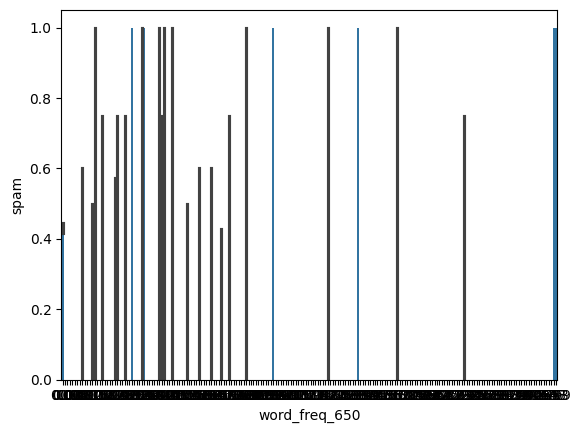

In [79]:
sns.barplot(x=d['word_freq_650'],y=y)
plt.show()

In [60]:
predictors = d.drop(['spam'], axis=1)
target = d["spam"]
X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)
X_train.shape
X_test.shape

(921, 57)

In [74]:
classifer = GaussianNB()
model = classifer.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print("The accuracy is"+str(metrics.accuracy_score(Y_test,Y_pred)*100)+"%")
print(confusion_matrix(Y_test, Y_pred))
target_names = ['class 0', 'class 1']
print(classification_report(Y_test, Y_pred,
target_names=target_names))
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred,
pos_label=2)


The accuracy is80.67318132464713%
[[386 152]
 [ 26 357]]
              precision    recall  f1-score   support

     class 0       0.94      0.72      0.81       538
     class 1       0.70      0.93      0.80       383

    accuracy                           0.81       921
   macro avg       0.82      0.82      0.81       921
weighted avg       0.84      0.81      0.81       921



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1180: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


In [76]:
classifer = GaussianNB(priors=[0.25, 0.75])

model = classifer.fit(X_train, Y_train)
Y_pred2 = model.predict(X_test)
print("The accuracy is "+str(metrics.accuracy_score(Y_test,Y_pred2)*100)+"%")
print(confusion_matrix(Y_test, Y_pred2))



The accuracy is 80.78175895765473%
[[386 152]
 [ 25 358]]
